Project_1 visualization and testing

In [1]:
import pandas as pd

ImportError: C extension: No module named 'pandas._libs.tslib' not built. If you want to import pandas from the source directory, you may need to run 'python setup.py build_ext --inplace --force' to build the C extensions first.

In [4]:
import pandas as pd
import os 
from matplotlib import pyplot as plt
import numpy as np



#Decide what columns we need
A_csv = pd.read_csv('../xaa.csv')
B_csv = pd.read_csv('../xab.csv', header=None)
C_csv = pd.read_csv('../xac.csv', header=None)
D_csv = pd.read_csv('../xad.csv', header=None)
#Add correct index to split csv
B_csv.columns = A_csv.columns
C_csv.columns = A_csv.columns
D_csv.columns = A_csv.columns
#Merging
AB_csv = pd.merge(A_csv, B_csv,how='outer')

ABC_csv = pd.merge(AB_csv, C_csv,how='outer')

ABCD_csv = pd.merge(ABC_csv, D_csv,how='outer')

master_df = ABCD_csv



ImportError: C extension: No module named 'pandas._libs.tslib' not built. If you want to import pandas from the source directory, you may need to run 'python setup.py build_ext --inplace --force' to build the C extensions first.

In [ ]:
cat_id = master_df['CategoryID'].unique()
for index in cat_id:
    master_df['CategotyID']

In [1]:
 master_df['CategotyID'] == "PREVENT"

NameError: name 'master_df' is not defined

In [5]:
!where python

C:\Users\Mason Carnahan\Documents\python_envs\this_works\Scripts\python.exe
C:\Users\Mason Carnahan\Anaconda3\python.exe


In [8]:
A_csv_drop = A_csv.drop(['Year', 'CityName','GeographicLevel','Data_Value_Type','PopulationCount','GeoLocation','MeasureId'], axis = 1)
#,'DataValueTypeID',  'Data_Value_Footnote', 'PopulationCount','GeoLocation', 'CategoryID', 'MeasureId', 'CityFIPS', 'TractFIPS','Short_Question_Text'], axis = 1)

A_csv_drop_df = A_csv_drop.groupby(['StateAbbr', 'CategoryID', 'Measure']).mean()

A_csv_drop_rename = A_csv_drop_df.rename(columns = {"Data_Value": "%_of_pop"})

A_csv_drop_rename_ireset = A_csv_drop_rename.reset_index()

A_csv_dri_outcome = A_csv_drop_rename_ireset.set_index("StateAbbr")

display(
    A_csv_dri_outcome.head(),
    A_csv_drop_df.head()
)

,CategoryID,Measure,%_of_pop
StateAbbr,,,
AK,HLTHOUT,All teeth lost among adults aged >=65 Years,13.161404
AK,HLTHOUT,Arthritis among adults aged >=18 Years,20.054386
AK,HLTHOUT,Cancer (excluding skin cancer) among adults ag...,5.185965
AK,HLTHOUT,Chronic kidney disease among adults aged >=18 ...,2.243860
AK,HLTHOUT,Chronic obstructive pulmonary disease among ad...,5.110526


Data_Value
StateAbbr CategoryID Measure                                                       
AK        HLTHOUT    All teeth lost among adults aged >=65 Years          13.161404
                     Arthritis among adults aged >=18 Years               20.054386
                     Cancer (excluding skin cancer) among adults age...    5.185965
                     Chronic kidney disease among adults aged >=18 Y...    2.243860
                     Chronic obstructive pulmonary disease among adu...    5.110526

In [9]:
##Original Work with oversized CSV##
#cities_500_csv_dropped_colns = cities_500_csv
#cities_500_csv_dropped_colns = cities_500_csv_dropped_colns[['Year', 'StateAbbr', 'CityName', 'CategoryID','Measure', 'Data_Value','GeoLocation']]
#average the meaningful data ('Measure')
#Mean_cities_measures_df = cities_500_csv_dropped_colns.groupby(['Year','StateAbbr','Measure']).mean()
#Mean_cities_measures_df.head()
#############################################

#Breaking into "HLTHOUT" , PREVENT, and UNHBEH
all_HLTHOUT = A_csv_dri_outcome.loc[A_csv_dri_outcome['CategoryID'] == 'HLTHOUT', :]
all_PREVENT = A_csv_dri_outcome.loc[A_csv_dri_outcome['CategoryID'] == 'PREVENT', :]
all_UNHBEH = A_csv_dri_outcome.loc[A_csv_dri_outcome['CategoryID'] == 'UNHBEH', :]

display(
    all_HLTHOUT.head(),
    all_HLTHOUT['Measure'].unique(),
    all_PREVENT.head(),
    all_PREVENT['Measure'].unique(),
    all_UNHBEH.head(),
    all_UNHBEH['Measure'].unique()
)

,CategoryID,Measure,%_of_pop
StateAbbr,,,
AK,HLTHOUT,All teeth lost among adults aged >=65 Years,13.161404
AK,HLTHOUT,Arthritis among adults aged >=18 Years,20.054386
AK,HLTHOUT,Cancer (excluding skin cancer) among adults ag...,5.185965
AK,HLTHOUT,Chronic kidney disease among adults aged >=18 ...,2.243860
AK,HLTHOUT,Chronic obstructive pulmonary disease among ad...,5.110526


array(['All teeth lost among adults aged >=65 Years',
       'Arthritis among adults aged >=18 Years',
       'Cancer (excluding skin cancer) among adults aged >=18 Years',
       'Chronic kidney disease among adults aged >=18 Years',
       'Chronic obstructive pulmonary disease among adults aged >=18 Years',
       'Coronary heart disease among adults aged >=18 Years',
       'Current asthma among adults aged >=18 Years',
       'Diagnosed diabetes among adults aged >=18 Years',
       'High blood pressure among adults aged >=18 Years',
       'High cholesterol among adults aged >=18 Years who have been screened in the past 5 Years',
       'Mental health not good for >=14 days among adults aged >=18 Years',
       'Physical health not good for >=14 days among adults aged >=18 Years',
       'Stroke among adults aged >=18 Years'], dtype=object)

,CategoryID,Measure,%_of_pop
StateAbbr,,,
AK,PREVENT,Cholesterol screening among adults aged >=18 Y...,68.815789
AK,PREVENT,Current lack of health insurance among adults ...,12.514035
AK,PREVENT,"Fecal occult blood test, sigmoidoscopy, or col...",61.336842
AK,PREVENT,Mammography use among women aged 50–74 Years,71.077193
AK,PREVENT,Older adult men aged >=65 Years who are up to ...,38.973684


array(['Cholesterol screening among adults aged >=18 Years',
       'Current lack of health insurance among adults aged 18–64 Years',
       'Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50–75 Years',
       'Mammography use among women aged 50–74 Years',
       'Older adult men aged >=65 Years who are up to date on a core set of clinical preventive services: Flu shot past Year, PPV shot ever, Colorectal cancer screening',
       'Older adult women aged >=65 Years who are up to date on a core set of clinical preventive services: Flu shot past Year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 Years',
       'Papanicolaou smear use among adult women aged 21–65 Years',
       'Taking medicine for high blood pressure control among adults aged >=18 Years with high blood pressure',
       'Visits to dentist or dental clinic among adults aged >=18 Years',
       'Visits to doctor for routine checkup within the past Year among adults aged >=18 Y

,CategoryID,Measure,%_of_pop
StateAbbr,,,
AK,UNHBEH,Binge drinking among adults aged >=18 Years,19.294737
AK,UNHBEH,Current smoking among adults aged >=18 Years,18.070175
AK,UNHBEH,No leisure-time physical activity among adults...,17.615789
AK,UNHBEH,Obesity among adults aged >=18 Years,27.728070
AK,UNHBEH,Sleeping less than 7 hours among adults aged >...,31.268421


array(['Binge drinking among adults aged >=18 Years',
       'Current smoking among adults aged >=18 Years',
       'No leisure-time physical activity among adults aged >=18 Years',
       'Obesity among adults aged >=18 Years',
       'Sleeping less than 7 hours among adults aged >=18 Years'],
      dtype=object)

In [10]:
unhealthy_means = all_UNHBEH.groupby(['StateAbbr','Measure']).mean()
healthy_means = all_PREVENT.groupby(['StateAbbr','Measure']).mean()
outcome_means = all_HLTHOUT.groupby(['StateAbbr','Measure']).mean()

display(
    healthy_means.head(),
    outcome_means.head(),
    unhealthy_means.head()
)

%_of_pop
StateAbbr Measure                                                      
AK        Cholesterol screening among adults aged >=18 Years  68.815789
          Current lack of health insurance among adults a...  12.514035
          Fecal occult blood test, sigmoidoscopy, or colo...  61.336842
          Mammography use among women aged 50–74 Years        71.077193
          Older adult men aged >=65 Years who are up to d...  38.973684

%_of_pop
StateAbbr Measure                                                      
AK        All teeth lost among adults aged >=65 Years         13.161404
          Arthritis among adults aged >=18 Years              20.054386
          Cancer (excluding skin cancer) among adults age...   5.185965
          Chronic kidney disease among adults aged >=18 Y...   2.243860
          Chronic obstructive pulmonary disease among adu...   5.110526

%_of_pop
StateAbbr Measure                                                      
AK        Binge drinking among adults aged >=18 Years         19.294737
          Current smoking among adults aged >=18 Years        18.070175
          No leisure-time physical activity among adults ...  17.615789
          Obesity among adults aged >=18 Years                27.728070
          Sleeping less than 7 hours among adults aged >=...  31.268421

In [13]:
#Reset index for .loc

unhealthy_means = unhealthy_means.reset_index()



In [56]:
#Boolean measures
#only_billys = df.loc[df["first_name"] == "Billy", :]
unhealthy_means_binge= unhealthy_means.loc[unhealthy_means['Measure']=="Binge drinking among adults aged >=18 Years", :]


unhealthy_means_binge = unhealthy_means_binge.sort_values(by=['%_of_pop'],ascending=False)

unhealthy_means_binge["Rank"] = range(len(unhealthy_means_binge['StateAbbr']))
                                                          
unhealthy_means_binge = unhealthy_means_binge.drop(columns = "level_0")
unhealthy_means_binge = unhealthy_means_binge.drop(columns = "index")
unhealthy_means_binge

,StateAbbr,Measure,%_of_pop,Rank
35,DC,Binge drinking among adults aged >=18 Years,23.308333,0
25,CO,Binge drinking among adults aged >=18 Years,19.664326,1
0,AK,Binge drinking among adults aged >=18 Years,19.294737,2
45,FL,Binge drinking among adults aged >=18 Years,17.491833,3
50,US,Binge drinking among adults aged >=18 Years,17.450000,4
20,CA,Binge drinking among adults aged >=18 Years,17.379456,5
15,AZ,Binge drinking among adults aged >=18 Years,16.724512,6
30,CT,Binge drinking among adults aged >=18 Years,16.018644,7
10,AR,Binge drinking among adults aged >=18 Years,15.385937,8
40,DE,Binge drinking among adults aged >=18 Years,15.092308,9


NameError: name 'ax1' is not defined

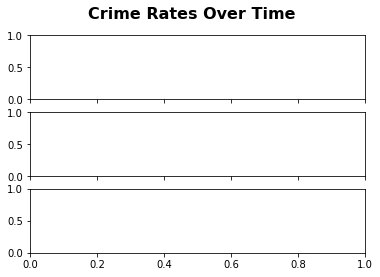

In [45]:
#Test Plots
# Plot
fig, (st_chol, st_bp, st_heart) = plt.subplots(3, sharex=True)
fig.suptitle("Crime Rates Over Time", fontsize=16, fontweight="bold")

ax1.set_xlim(min(year), max(year))
ax1.plot(year, violent_crime_rate, linewidth=1, marker="o")
ax1.plot(year, vc_fit, "b--", linewidth=1)
ax1.set_ylabel("Violent Crime Rate")


In [ ]:
#create df for healthy, unhealthy, and outcomes.

df_structure = pd.DataFrame ([
    {"State": 'TX', 'Measure': '%chol_screen>18', 'Rank': '16th'},
    {"State": 'CA', 'Measure': '%chol_screen>18', 'Rank': '3rd'},
    {"State": 'MI', 'Measure': '%chol_screen>18', 'Rank': '47th'}
    
])
df_structure

In [ ]:
#create df for healthy, unhealthy, and outcomes. Idea is to have them look like this
# Data frame title will denote the measure displayed in the table
df_structure = pd.DataFrame(
    {"State": ['TX', 'CA', 'MI'],
     "%_of_pop": ['75', '85', '59'],
     "Rank": ['7th', '3rd', '46th']}
)
df_structure



In [ ]:
## How to separate by healthy, unhealthy, and outcome.
#need to drop year col and group by state
\



In [ ]:
## Create ranking system with cities and states